In [1]:
# Import de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz

In [2]:
# Carregamento de Dados
test = pd.read_csv(r'Datasets\test_data.csv', encoding='latin-1')
train = pd.read_csv(r'Datasets\training_data.csv', encoding='latin-1')

In [3]:
test.nunique()

city_name                     1
record_date                1500
AVERAGE_FREE_FLOW_SPEED     199
AVERAGE_TIME_DIFF           610
AVERAGE_FREE_FLOW_TIME      337
LUMINOSITY                    3
AVERAGE_TEMPERATURE          32
AVERAGE_ATMOSP_PRESSURE      42
AVERAGE_HUMIDITY             70
AVERAGE_WIND_SPEED           14
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                  9
dtype: int64

In [4]:
# Vizualização dos dados

In [5]:
test.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
dtypes: float64(8), object(5)
memory usage: 152.5+ KB


In [7]:
test.duplicated().sum()

np.int64(0)

In [8]:
# Valores Nulos
test.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS          599
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               1360
dtype: int64

<Axes: >

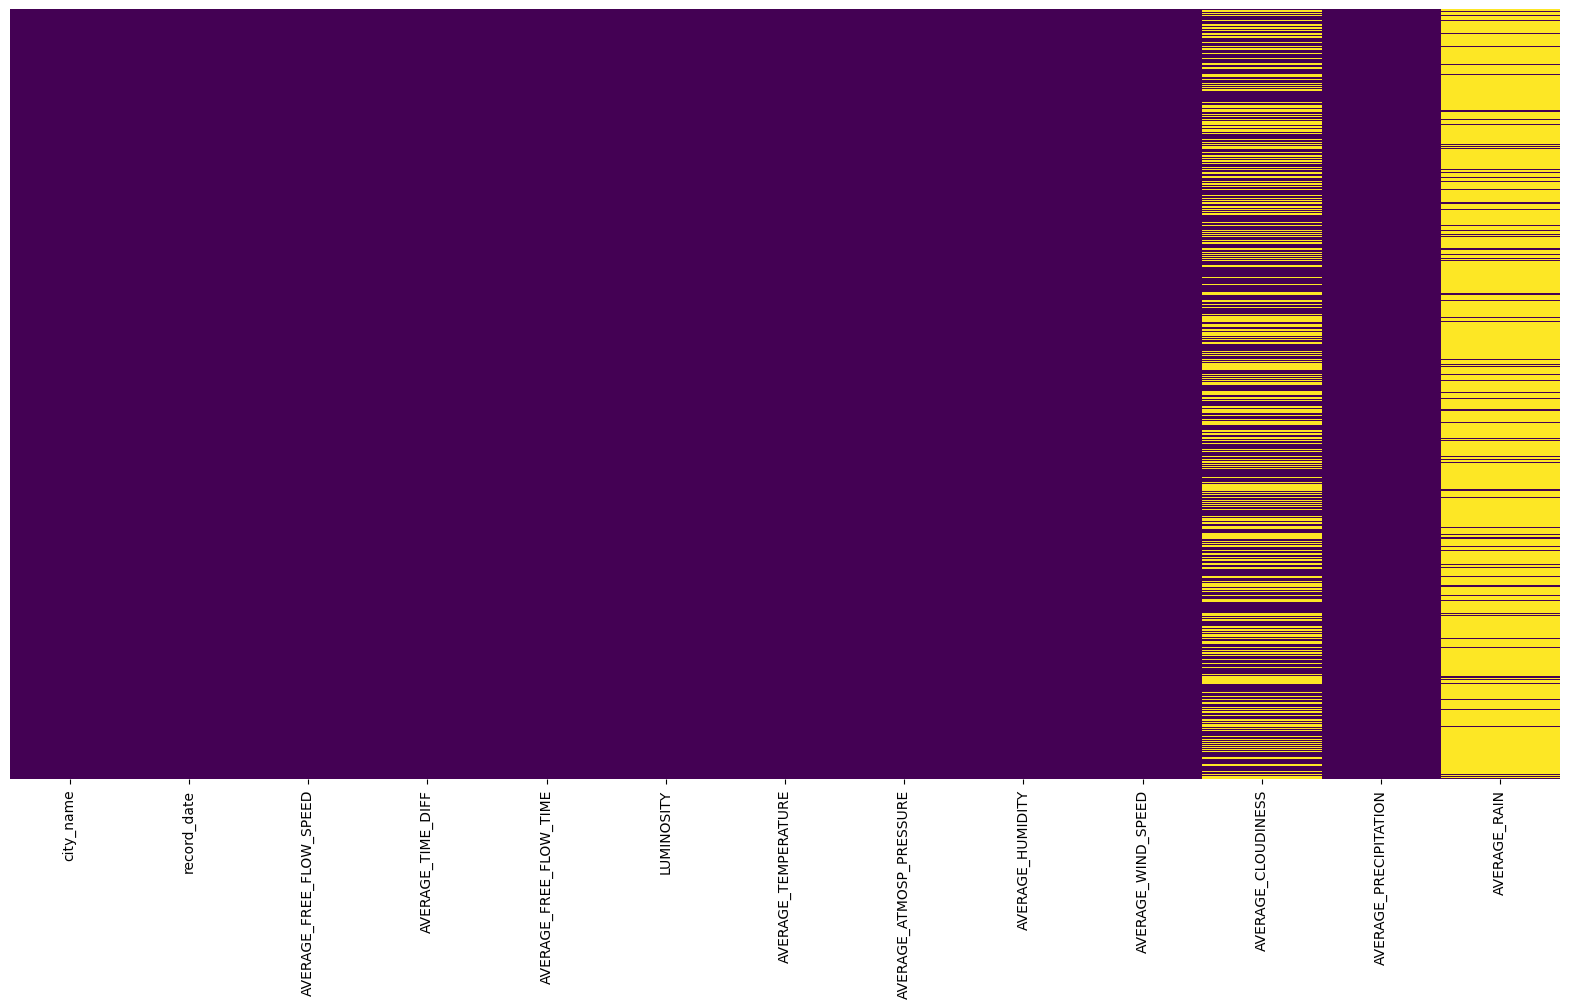

In [9]:
# # Visualização de Valores Nulos
plt.figure(figsize=(20,10))
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [10]:
# Valores Únicos
test.nunique()

city_name                     1
record_date                1500
AVERAGE_FREE_FLOW_SPEED     199
AVERAGE_TIME_DIFF           610
AVERAGE_FREE_FLOW_TIME      337
LUMINOSITY                    3
AVERAGE_TEMPERATURE          32
AVERAGE_ATMOSP_PRESSURE      42
AVERAGE_HUMIDITY             70
AVERAGE_WIND_SPEED           14
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                  9
dtype: int64

In [11]:
train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [13]:
train.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [14]:
train.duplicated().sum()

np.int64(0)

In [15]:
# Valores Nulos
train.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

<Axes: >

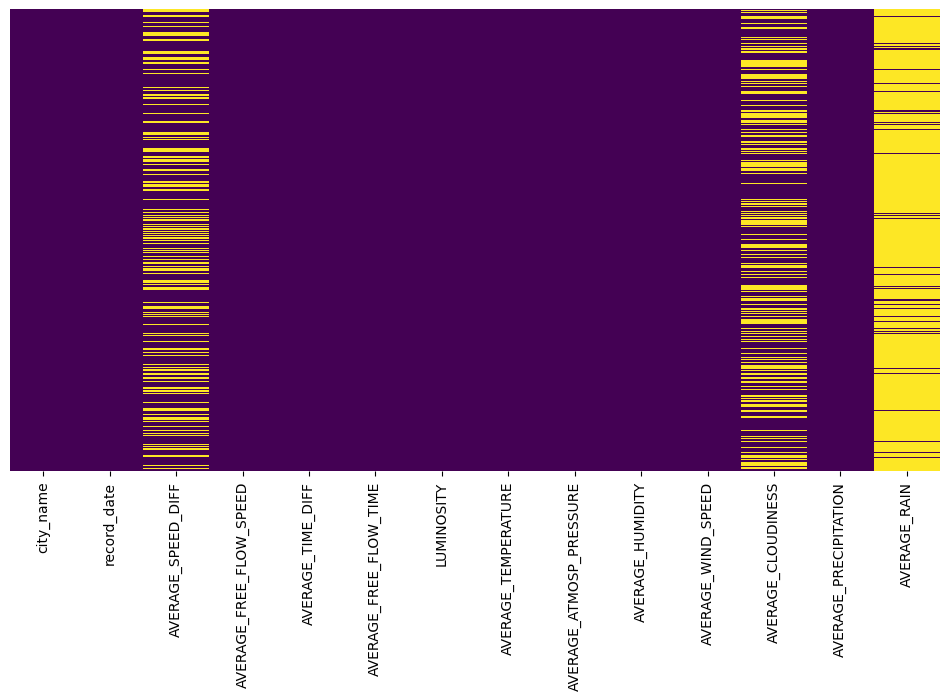

In [16]:
# Visusalização de Valores Nulos
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [17]:
# Valores Únicos
train.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            4
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
dtype: int64

In [18]:
train.drop(['city_name', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'], axis=1, inplace=True)
train.isnull().sum()

record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
dtype: int64

In [19]:
# converter valores NaN em AVERAGE_SPEED_DIFF para None
train['AVERAGE_SPEED_DIFF'].fillna('None', inplace=True)

C:\Users\Gui\AppData\Local\Temp\ipykernel_22772\3405529601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['AVERAGE_SPEED_DIFF'].fillna('None', inplace=True)


In [20]:
test.nunique()

city_name                     1
record_date                1500
AVERAGE_FREE_FLOW_SPEED     199
AVERAGE_TIME_DIFF           610
AVERAGE_FREE_FLOW_TIME      337
LUMINOSITY                    3
AVERAGE_TEMPERATURE          32
AVERAGE_ATMOSP_PRESSURE      42
AVERAGE_HUMIDITY             70
AVERAGE_WIND_SPEED           14
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                  9
dtype: int64

In [21]:
test.drop(['city_name', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'], axis=1, inplace=True)
test.isnull().sum()

record_date                  0
AVERAGE_FREE_FLOW_SPEED      0
AVERAGE_TIME_DIFF            0
AVERAGE_FREE_FLOW_TIME       0
LUMINOSITY                   0
AVERAGE_TEMPERATURE          0
AVERAGE_ATMOSP_PRESSURE      0
AVERAGE_HUMIDITY             0
AVERAGE_WIND_SPEED           0
AVERAGE_CLOUDINESS         599
dtype: int64

In [22]:
train['year'] = pd.to_datetime(train['record_date']).dt.year
train['month'] = pd.to_datetime(train['record_date']).dt.month
train['day'] = pd.to_datetime(train['record_date']).dt.day
train['hour'] = pd.to_datetime(train['record_date']).dt.hour
train['week'] = pd.to_datetime(train['record_date']).dt.isocalendar().week
test['year'] = pd.to_datetime(test['record_date']).dt.year
test['month'] = pd.to_datetime(test['record_date']).dt.month
test['day'] = pd.to_datetime(test['record_date']).dt.day
test['hour'] = pd.to_datetime(test['record_date']).dt.hour
test['week'] = pd.to_datetime(test['record_date']).dt.isocalendar().week
train.drop('record_date', axis=1, inplace=True)
test.drop('record_date', axis=1, inplace=True)

In [23]:
test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,year,month,day,hour,week
0,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,2019,2,13,23,7
1,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,2018,11,28,20,48
2,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,2018,8,14,5,33
3,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,2019,7,6,17,27
4,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,2018,10,15,6,42


In [24]:
train.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,year,month,day,hour,week
0,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,2019,8,29,7,35
1,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,2018,8,10,14,32
2,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,2019,9,1,16,35
3,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,2019,2,26,11,9
4,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,2019,6,6,12,23


In [25]:
# Moda para AVERAGE_CLOUDINESS de acordo com o ano, o mês e o dia  respetivo

# Criar uma série com a moda para cada combinação de ano, mês, dia, hora 
train_mode = train.groupby(['year','month', 'day', 'hour'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = test.groupby(['year','month', 'day', 'hour'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
train['AVERAGE_CLOUDINESS'] = train.apply(lambda row: train_mode[row['year'], row['month'], row['day'], row['hour']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
test['AVERAGE_CLOUDINESS'] = test.apply(lambda row: test_mode[row['year'], row['month'], row['day'], row['hour']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [26]:
# Moda para AVERAGE_CLOUDINESS de acordo com o ano, o mês e o dia  respetivo

# Criar uma série com a moda para cada combinação de ano, mês, dia
train_mode = train.groupby(['year','month', 'day'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = test.groupby(['year','month', 'day'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
train['AVERAGE_CLOUDINESS'] = train.apply(lambda row: train_mode[row['year'], row['month'], row['day']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
test['AVERAGE_CLOUDINESS'] = test.apply(lambda row: test_mode[row['year'], row['month'], row['day']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [27]:
# Moda para AVERAGE_CLOUDINESS de acordo com o ano, o mês e o dia  respetivo

# Criar uma série com a moda para cada combinação de ano, mês, dia, hora 
train_mode = train.groupby(['year','week'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = test.groupby(['year','week'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
train['AVERAGE_CLOUDINESS'] = train.apply(lambda row: train_mode[row['year'], row['week']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
test['AVERAGE_CLOUDINESS'] = test.apply(lambda row: test_mode[row['year'], row['week']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [28]:
# Moda para AVERAGE_CLOUDINESS de acordo com o ano, o mês e o dia  respetivo

# Criar uma série com a moda para cada combinação de ano, mês, dia, hora 
train_mode = train.groupby(['year','month'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = test.groupby(['year','month'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
train['AVERAGE_CLOUDINESS'] = train.apply(lambda row: train_mode[row['year'], row['month']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
test['AVERAGE_CLOUDINESS'] = test.apply(lambda row: test_mode[row['year'], row['month']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [29]:
test.isnull().sum()

AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
year                       0
month                      0
day                        0
hour                       0
week                       0
dtype: int64

In [30]:
train.isnull().sum()

AVERAGE_SPEED_DIFF         0
AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
year                       0
month                      0
day                        0
hour                       0
week                       0
dtype: int64

In [31]:
speed_map = {
    'None': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very_High': 4
}

train['AVERAGE_SPEED_DIFF'] = train['AVERAGE_SPEED_DIFF'].map(speed_map)
train.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,year,month,day,hour,week
0,2,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,céu pouco nublado,2019,8,29,7,35
1,3,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,2018,8,10,14,32
2,3,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,nublado,2019,9,1,16,35
3,3,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,2019,2,26,11,9
4,2,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,nuvens dispersas,2019,6,6,12,23


In [32]:
test['LUMINOSITY'].value_counts()

LUMINOSITY
DARK         730
LIGHT        725
LOW_LIGHT     45
Name: count, dtype: int64

In [33]:
luminosity_map = {
    'DARK': 0,
    'LOW_LIGHT': 1,
    'LIGHT': 2,
}

train['LUMINOSITY'] = train['LUMINOSITY'].map(luminosity_map)
test['LUMINOSITY'] = test['LUMINOSITY'].map(luminosity_map)
train.head()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,year,month,day,hour,week
0,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,céu pouco nublado,2019,8,29,7,35
1,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,céu claro,2018,8,10,14,32
2,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,nublado,2019,9,1,16,35
3,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,céu claro,2019,2,26,11,9
4,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,nuvens dispersas,2019,6,6,12,23


In [34]:
test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,year,month,day,hour,week
0,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,céu claro,2019,2,13,23,7
1,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,nuvens dispersas,2018,11,28,20,48
2,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,céu claro,2018,8,14,5,33
3,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,céu pouco nublado,2019,7,6,17,27
4,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,céu claro,2018,10,15,6,42


In [35]:
#Fazer One-Hot Encoding na coluna AVERAGE_CLOUDINESS sem combinar os dataframes de treino e teste
train = pd.get_dummies(train, columns=['AVERAGE_CLOUDINESS'], dtype=int)
test = pd.get_dummies(test, columns=['AVERAGE_CLOUDINESS'], dtype=int)
#Colocar em binario as colunas de AVERAGE_CLOUDINESS
train.head()


,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,year,...,week,AVERAGE_CLOUDINESS_algumas nuvens,AVERAGE_CLOUDINESS_céu claro,AVERAGE_CLOUDINESS_céu limpo,AVERAGE_CLOUDINESS_céu pouco nublado,AVERAGE_CLOUDINESS_nublado,AVERAGE_CLOUDINESS_nuvens dispersas,AVERAGE_CLOUDINESS_nuvens quebradas,AVERAGE_CLOUDINESS_nuvens quebrados,AVERAGE_CLOUDINESS_tempo nublado
0,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,2019,...,35,0,0,0,1,0,0,0,0,0
1,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,2018,...,32,0,1,0,0,0,0,0,0,0
2,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,2019,...,35,0,0,0,0,1,0,0,0,0
3,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,2019,...,9,0,1,0,0,0,0,0,0,0
4,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,2019,...,23,0,0,0,0,0,1,0,0,0


In [36]:
test.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,year,month,...,week,AVERAGE_CLOUDINESS_algumas nuvens,AVERAGE_CLOUDINESS_céu claro,AVERAGE_CLOUDINESS_céu limpo,AVERAGE_CLOUDINESS_céu pouco nublado,AVERAGE_CLOUDINESS_nublado,AVERAGE_CLOUDINESS_nuvens dispersas,AVERAGE_CLOUDINESS_nuvens quebradas,AVERAGE_CLOUDINESS_nuvens quebrados,AVERAGE_CLOUDINESS_tempo nublado
0,39.2,0.0,91.0,0,8.0,1026.0,71.0,1.0,2019,2,...,7,0,1,0,0,0,0,0,0,0
1,42.5,12.2,76.8,0,11.0,1020.0,93.0,4.0,2018,11,...,48,0,0,0,0,0,1,0,0,0
2,45.9,0.0,86.3,0,14.0,1017.0,93.0,0.0,2018,8,...,33,0,1,0,0,0,0,0,0,0
3,33.2,51.7,89.9,2,22.0,1016.0,77.0,4.0,2019,7,...,27,0,0,0,1,0,0,0,0,0
4,44.0,3.5,85.5,0,12.0,1004.0,100.0,9.0,2018,10,...,42,0,1,0,0,0,0,0,0,0


In [37]:
train['AVERAGE_SPEED_DIFF'].value_counts()

AVERAGE_SPEED_DIFF
0    2200
2    1651
1    1419
3    1063
4     479
Name: count, dtype: int64

In [38]:
#Definir X e y para o conjunto de treino
X = train.drop('AVERAGE_SPEED_DIFF', axis=1)
y = train['AVERAGE_SPEED_DIFF']

In [39]:
#Fazer train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2025)

In [40]:
#Criar arvore de decisão para classificação
clf = DecisionTreeClassifier(random_state=2025)
clf = clf.fit(X_train, y_train)

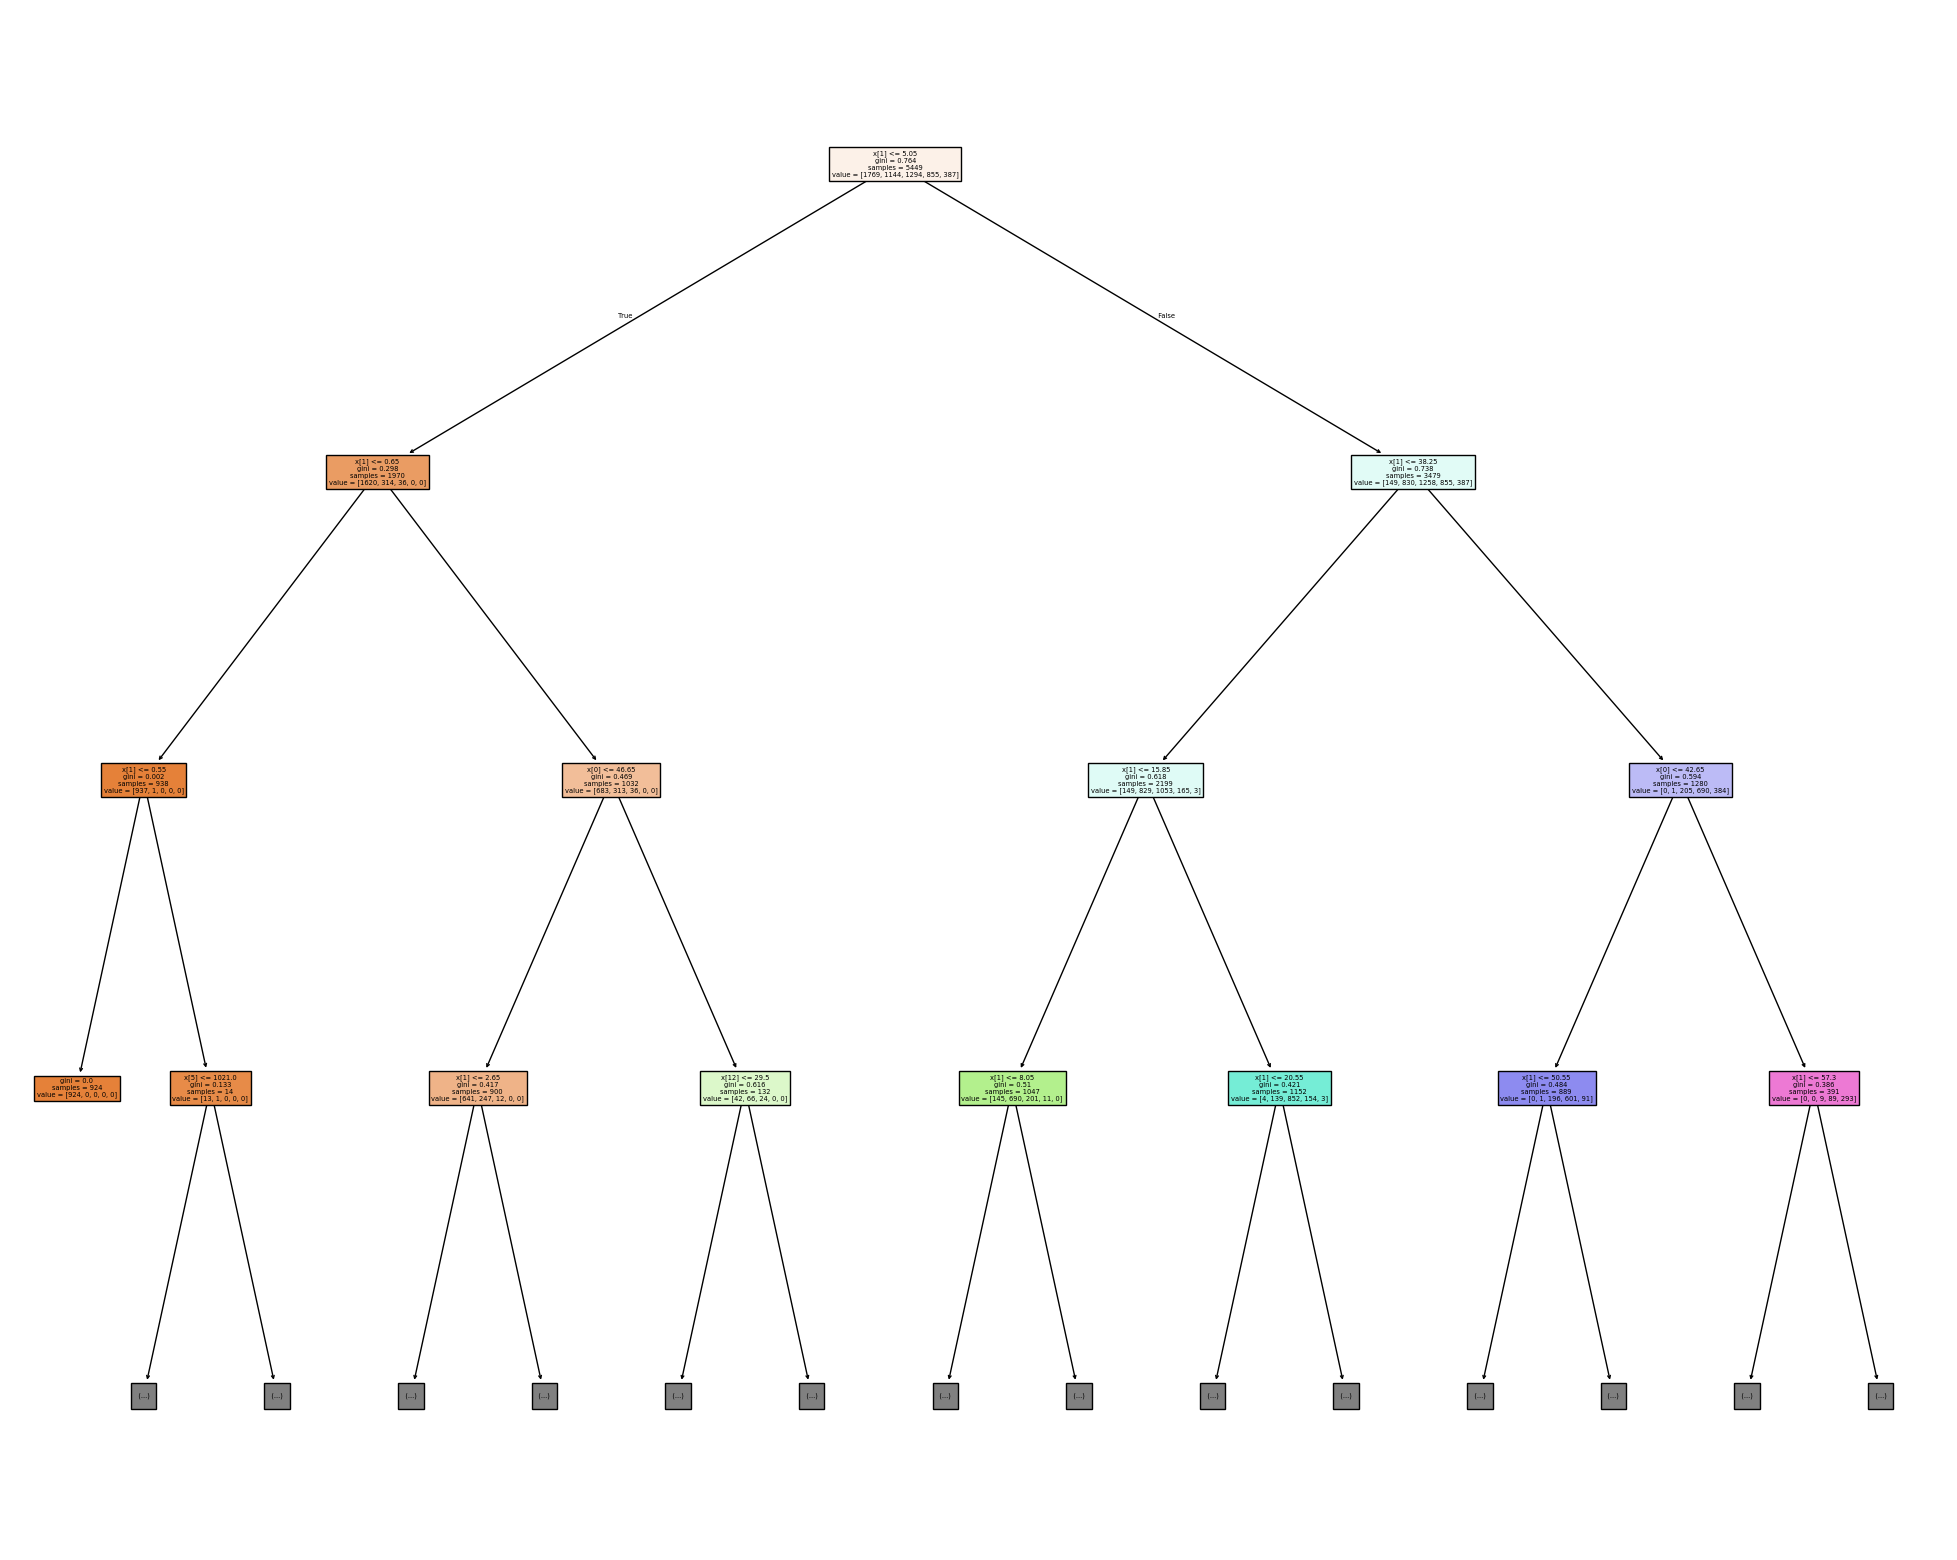

In [41]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,max_depth=3, filled=True)
plt.show()

In [42]:
train_predictions = clf.predict(X_val)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_val, train_predictions))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       431
           1       0.58      0.65      0.61       275
           2       0.70      0.67      0.68       357
           3       0.69      0.64      0.67       208
           4       0.73      0.75      0.74        92

    accuracy                           0.73      1363
   macro avg       0.71      0.71      0.71      1363
weighted avg       0.73      0.73      0.73      1363



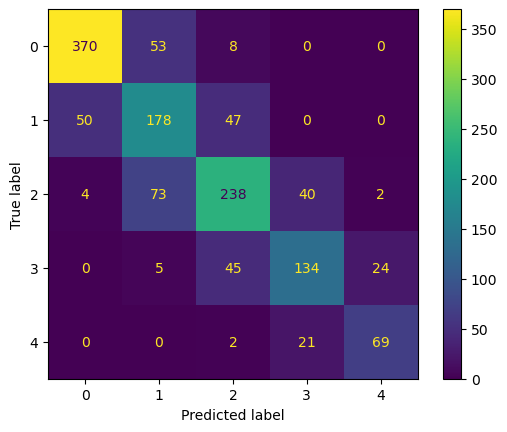

In [43]:
ConfusionMatrixDisplay.from_predictions(y_val, train_predictions)
plt.show()

In [44]:
#Aplicar o GridSearch
#incluir o parâmetro de post-pruning (ccp_alpha) dentro da grelha de parâmetros do GridSearchCV. Assim, o GridSearchCV encontraria a melhor combinação de max_depth (pré-pruning) e ccp_alpha (post-pruning) em simultâneo.
print(clf.get_depth())
print(clf.get_n_leaves())

param_grid = {'criterion':['gini', 'entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'ccp_alpha':[0.0, 0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]}
estimator_dt = DecisionTreeClassifier(random_state=2025)
grid_dt = GridSearchCV(estimator_dt, param_grid, refit = True, verbose=2)
grid_dt.fit(X_train, y_train)

20
863
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=1; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=2; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=2; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=2; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=2; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=2; total time=   0.0s
[CV] END .........ccp_alpha=0.0, criterion=gini, max_depth=3; total time=   0.0s
[CV] END .........ccp_alpha=0.0, crite

,estimator,DecisionTreeC...om_state=2025)
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [45]:
grid_dt.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
print(classification_report(y_val, grid_dt.predict(X_val)))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       431
           1       0.63      0.75      0.69       275
           2       0.81      0.69      0.75       357
           3       0.74      0.73      0.73       208
           4       0.76      0.83      0.79        92

    accuracy                           0.78      1363
   macro avg       0.77      0.78      0.77      1363
weighted avg       0.79      0.78      0.78      1363



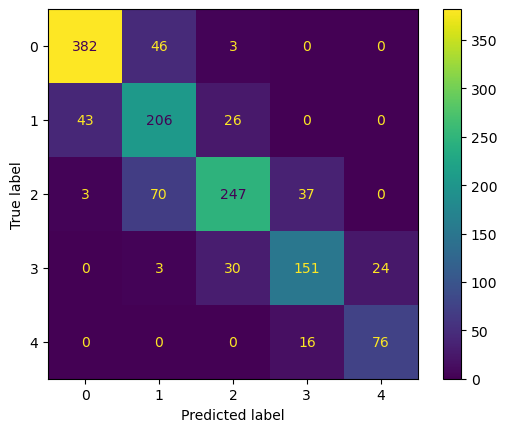

In [47]:
ConfusionMatrixDisplay.from_predictions(y_val, grid_dt.predict(X_val))
plt.show()

In [48]:
#Agora que ja temos o modelo treinado, podemos fazer as previsões no conjunto de teste
y_test = grid_dt.predict(test)

In [49]:
#%pip install xgboost

In [50]:
# Fazer XGBoosting Classifier

from xgboost import XGBClassifier
import xgboost as xgb
xgb_clf = XGBClassifier(random_state=2025, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


<Figure size 4000x2500 with 0 Axes>

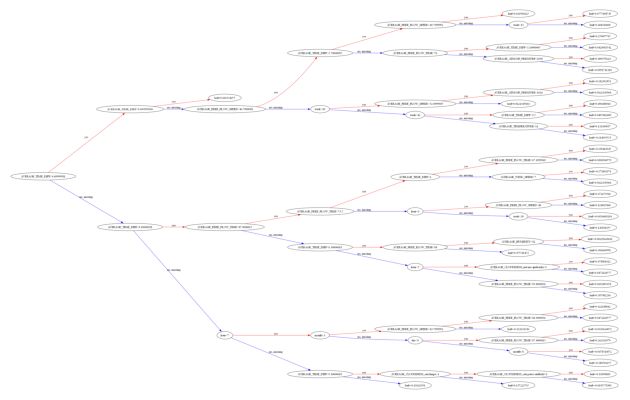

In [51]:
fig = plt.figure(figsize=(40,25))
xgb.plot_tree(xgb_clf, tree_idx=0, rankdir='LR')
plt.tight_layout()
plt.show()
plt.close()

In [52]:
train_predictions_xgb = xgb_clf.predict(X_val)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
print(classification_report(y_val, train_predictions_xgb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       431
           1       0.67      0.73      0.70       275
           2       0.79      0.78      0.78       357
           3       0.77      0.71      0.73       208
           4       0.80      0.80      0.80        92

    accuracy                           0.80      1363
   macro avg       0.79      0.78      0.78      1363
weighted avg       0.80      0.80      0.80      1363



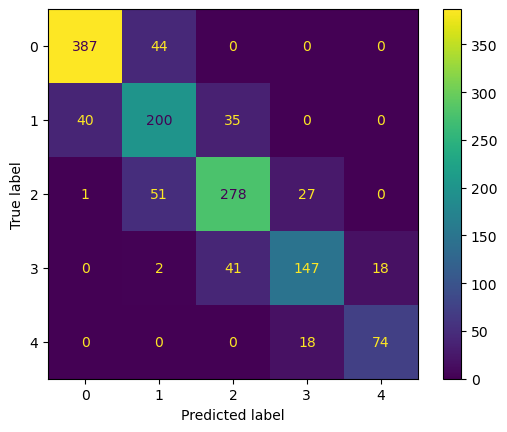

In [53]:
ConfusionMatrixDisplay.from_predictions(y_val, train_predictions_xgb)
plt.show()

In [54]:
#Aplicar o GridSearch para XGBClassifier
#incluir o parâmetro de post-pruning (ccp_alpha) dentro da grelha de parâmetros do GridSearchCV. Assim, o GridSearchCV encontraria a melhor combinação de max_depth (pré-pruning) e ccp_alpha (post-pruning) em simultâneo.
param_grid_xgb = {
    'max_depth' : [3, 5, 7, 9], # Profundidades comuns e eficazes
    'learning_rate':[0.05, 0.1, 0.2], # Taxas de aprendizagem típicas
    'n_estimators':[100, 200, 300], # Começar com menos árvores
    'gamma':[0, 0.1, 0.3], # Testar alguns valores para poda
    'subsample':[0.8, 1.0], # Testar sem amostragem e com um pouco
    'colsample_bytree':[0.8, 1.0], # Testar sem amostragem de features e com um pouco
    'reg_alpha':[0.1, 1], # Testar sem L1 e com alguma regularização L1
    'reg_lambda':[0.1, 1] # Testar valores L2 (raramente é 0 o ideal)
}
estimator_dt_xgb = XGBClassifier(random_state=2025, eval_metric='mlogloss')
grid_dt_xgb = GridSearchCV(estimator_dt_xgb, param_grid_xgb, refit = True, verbose=2, cv=5, n_jobs=-1)
grid_dt_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, ...], 'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [55]:
grid_dt_xgb.best_estimator_ 

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [56]:
print(classification_report(y_val, grid_dt_xgb.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       431
           1       0.69      0.74      0.72       275
           2       0.81      0.79      0.80       357
           3       0.76      0.74      0.75       208
           4       0.81      0.77      0.79        92

    accuracy                           0.81      1363
   macro avg       0.79      0.79      0.79      1363
weighted avg       0.81      0.81      0.81      1363



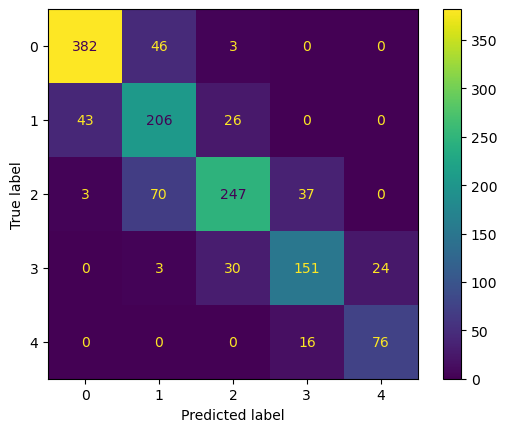

In [57]:
ConfusionMatrixDisplay.from_predictions(y_val, grid_dt.predict(X_val))
plt.show()

In [58]:
y_test_xgb = grid_dt_xgb.predict(test)

In [59]:
#Blending dos dois modelos
prob_test_decision_tree = grid_dt.predict_proba(test)
prob_test_xgb = grid_dt_xgb.predict_proba(test)
prob_test_blended = (prob_test_decision_tree + prob_test_xgb) / 2
y_test_blended = np.argmax(prob_test_blended, axis=1)


In [62]:
#Avaliar o desempenho do modelo blended no conjunto de validação
prob_val_decision_tree = grid_dt.predict_proba(X_val)
prob_val_xgb = grid_dt_xgb.predict_proba(X_val)
prob_val_blended = (prob_val_decision_tree + prob_val_xgb) / 2
y_val_blended = np.argmax(prob_val_blended, axis=1)
print(classification_report(y_val, y_val_blended))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       431
           1       0.68      0.72      0.70       275
           2       0.79      0.76      0.77       357
           3       0.76      0.73      0.75       208
           4       0.81      0.82      0.81        92

    accuracy                           0.80      1363
   macro avg       0.79      0.79      0.79      1363
weighted avg       0.80      0.80      0.80      1363



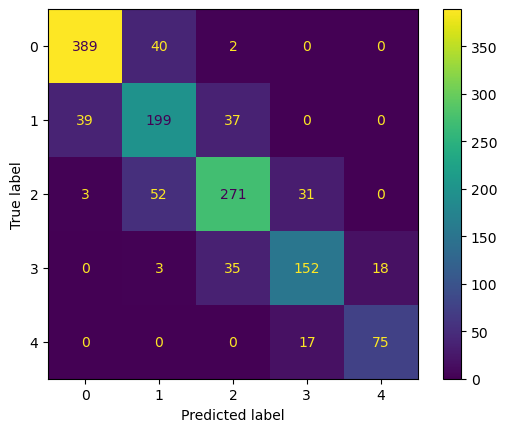

In [63]:
ConfusionMatrixDisplay.from_predictions(y_val, y_val_blended)
plt.show()

In [60]:
# Desmapeamento dos valores preditos para as categorias originais
speed_map_reverse = {v: k for k, v in speed_map.items()}
y_test_blended = pd.Series(y_test_blended).map(speed_map_reverse)
y_test_blended.head()

0    None
1     Low
2    None
3    High
4     Low
dtype: object

In [61]:
# Criar CSV de submissão
submission = pd.DataFrame({
    'RowId': test.index + 1,  # ou test['RowId'] se existir
    'AVERAGE_SPEED_DIFF': y_test_blended
})
submission.to_csv('submission.csv', index=False)
print("✅ Previsões criadas com sucesso!")

✅ Previsões criadas com sucesso!
